<a href="https://colab.research.google.com/github/Mohak-Bhatia/Python-ML-Project/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title Importing Pandas and making a DataFrame from dataset
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/new.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# @title Finding null values, 24 null values in column "Income"
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# @title Replacing missing values by the mean of all non-missing values in coulmn "Income"
df['Income'].mean()
df['Income'].fillna(df['Income'].mean(),inplace=True)
df.isnull().sum()

<ipython-input-4-5335932d5e38>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean(),inplace=True)


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


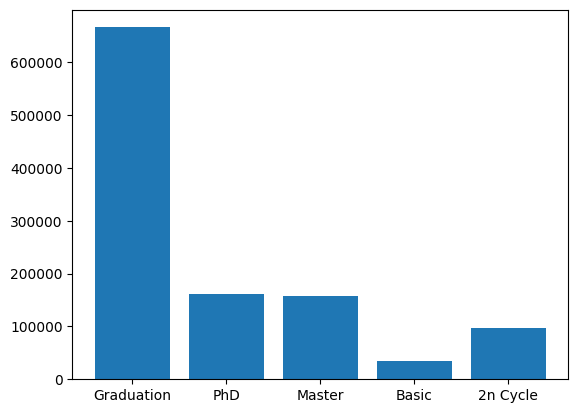

In [ ]:
# @title Visualizing the relationship between columns "Education" and "Income". Those who are Graduated seems to earn the most.
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(df['Education'],df['Income'])
plt.show()

<Axes: xlabel='Marital_Status', ylabel='Income'>

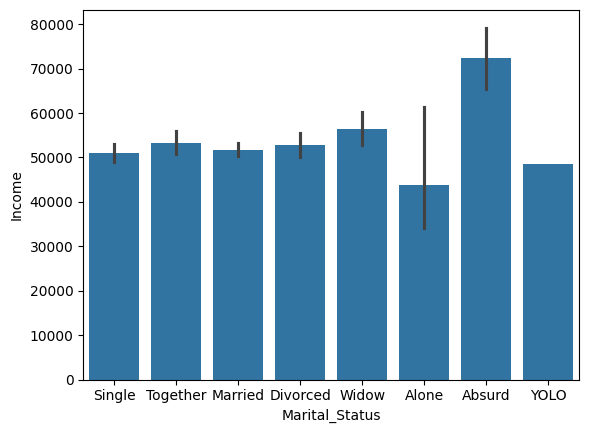

In [ ]:
# @title Visualizing the relationship between "Marital Status" and "Income". Those who have an "absurd" lifestyle seems to earn the most.
sns.barplot(x=df['Marital_Status'],y=df['Income'])

<Axes: xlabel='Year_Birth', ylabel='Income'>

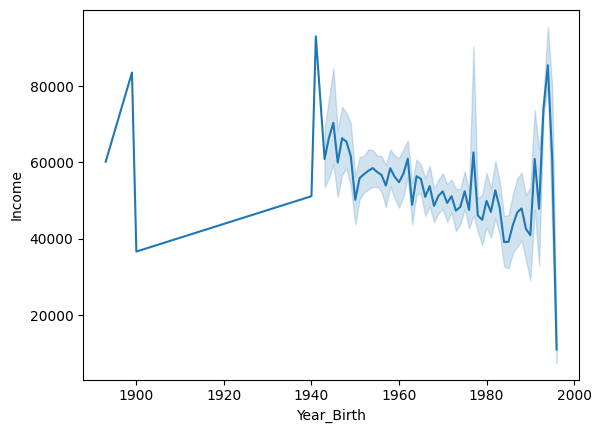

In [ ]:
# @title Drastically changing data trends in "Income" of people born within 20th century can be seen here.
sns.lineplot(x=df['Year_Birth'],y=df['Income'])

In [ ]:
# @title Encoding non-numeric values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])
        df[i] = pd.to_numeric(df[i])

In [ ]:
# @title Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=scaler.fit_transform(df)

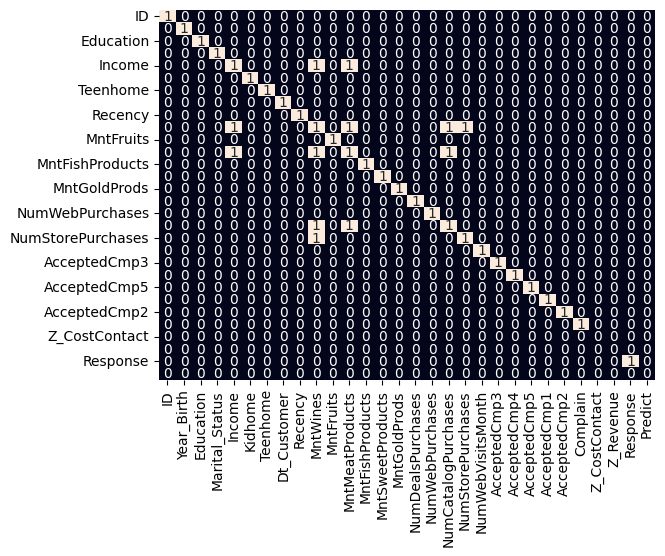

In [ ]:
# @title Using correlation matrix; "Income" correlates with "Teenhome","MntWines"; "MntWines" correlates with "MntMeatProducts"; "AcceptedCmp4" with "AcceptedCmp1" ; "NumCatalogPurchases" with "NumWebVisitsMonth"
import numpy as np
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr(method="spearman")
sns.heatmap(corr_matrix > 0.8, annot=True, cbar=False)
plt.show()

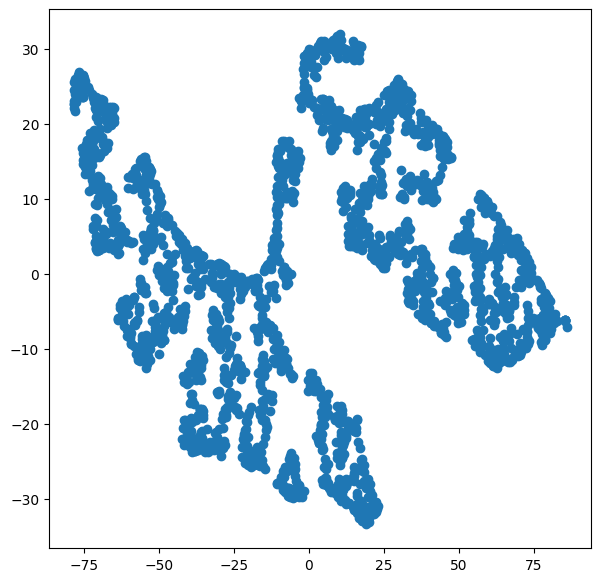

In [ ]:
# @title Using T-distributed Stochastic Neighbor Embedding and using Scatter Plot to identify segments
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [ ]:
# @title Using Kmeans Clustering on linearly seperable segments
from sklearn.cluster import KMeans
kmn=KMeans(n_clusters=3)
kmn.fit_predict(df)

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Predict,predict
0,5524,1957,2,4,58138.0,0,0,80,58,635,...,0,0,0,0,0,3,11,1,-1,0
1,2174,1954,2,4,46344.0,1,1,157,38,11,...,0,0,0,0,0,3,11,0,-1,1
2,4141,1965,2,5,71613.0,0,0,444,26,426,...,0,0,0,0,0,3,11,0,-1,0
3,6182,1984,2,5,26646.0,1,0,199,26,11,...,0,0,0,0,0,3,11,0,-1,1
4,5324,1981,4,3,58293.0,1,0,390,94,173,...,0,0,0,0,0,3,11,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,272,46,709,...,0,0,0,0,0,3,11,0,-1,0
2236,4001,1946,4,5,64014.0,2,1,207,56,406,...,0,0,1,0,0,3,11,0,-1,0
2237,7270,1981,2,2,56981.0,0,0,521,91,908,...,1,0,0,0,0,3,11,0,-1,0
2238,8235,1956,3,5,69245.0,0,1,500,8,428,...,0,0,0,0,0,3,11,0,-1,0


In [ ]:
kmn.labels_

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(df,labels=kmn.labels_)

0.5673876977524311

In [ ]:
# @title Using Silhouette score to identify most optimal number of clusters
ss=[]
number_of_clusters=[j for j in range(2,21)]
for i in range(2,21):
  km1=KMeans(n_clusters=i)
  km1.fit_predict(df)
  ss.append(silhouette_score(df,km1.labels_))

TypeError: 'list' object is not callable

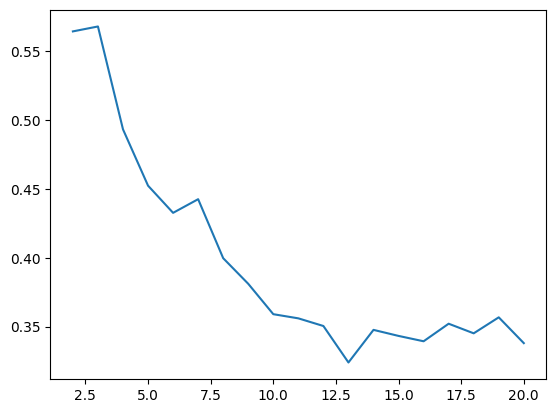

In [ ]:
plt.plot(number_of_clusters,ss)
plt.xlabel("clusters")
plt.ylabel("silhouette score")
plt.xticks(number_of_clusters)
plt.grid(axis="x")
plt.show()

In [ ]:
# @title Finally using K Means Clustering with 4 number of clusters
from sklearn.cluster import KMeans
kmn1=KMeans(n_clusters=4)
segment=kmn1.fit_predict(df)

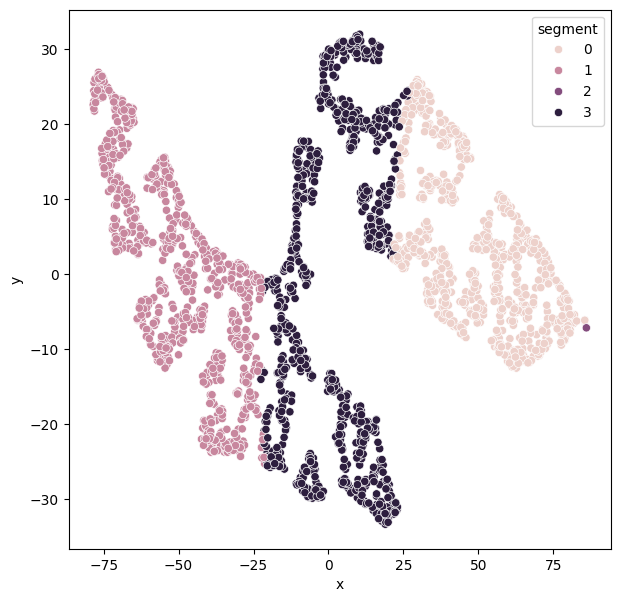

In [ ]:
# @title A visualization of final segmentation after Clustering.
plt.figure(figsize=(7, 7))
df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': segment})
sns.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
plt.show()